In [166]:
#install.packages("forecast", lib="./local_R_pack")
#install.packages("TSA", lib="./local_R_pack")

library(forecast, lib.loc="./local_R_pack")


In [10]:
df = read.csv('./Data/Storico/clean_dataset.csv')

In [11]:
head(df)

X,dep_day,arr_city_name,distance,arr_lat,arr_long,seatsleft,seats,fullseats,recommended_price,duration,provincia,regione,country_code
0,2017-01-01,ancona,425,43.61583,13.518915,1,1,0,24,18000,Ancona,Marche,IT
1,2017-01-01,aosta,179,45.73512,7.324020,2,3,13,10,9000,Aosta,Valle d'Aosta,IT
2,2017-01-01,arcore,37,45.62692,9.326543,3,3,0,1,3000,Monza-Brianza,Lombardia,IT
3,2017-01-01,ascoli piceno,529,42.86409,13.724874,1,2,1,29,21600,Ascoli Piceno,Marche,IT
4,2017-01-01,barzio,66,45.94364,9.465661,3,3,0,3,5400,Lecco,Lombardia,IT
5,2017-01-01,belfort,413,47.63967,6.863849,2,2,5,22,19200,Undefined,Undefined,FR


In [13]:
ita <- df[df$country_code == 'IT',]

In [16]:
prov = unique(ita$provincia)

ita <- ita[!(ita$provincia == 'Undefined'),]

[1] Ancona                Aosta                 Monza-Brianza        
 [4] Ascoli Piceno         Lecco                 Bergamo              
 [7] Bologna               Brescia               Novara               
[10] Caserta               Rimini                Forli-Cesena         
[13] Genova                Torino                Trento               
[16] Como                  Firenze               Grosseto             
[19] Treviso               Savona                Milano               
[22] Modena                Padova                Verbano-Cusio-Ossola 
[25] Parma                 Pavia                 Verona               
[28] Piacenza              Lucca                 Pistoia              
[31] Roma                  Rovigo                Perugia              
[34] Imperia               Siracusa              Sondrio              
[37] Udine                 Varese                Venezia              
[40] Vicenza               Viterbo               Arezzo               
[43] Asti                  Bari                  Biella               
[46] La Spezia             Livorno               Ravenna              
[49] Pisa                  Macerata              Fermo                
[52] Prato                 Reggio Emilia         Foggia               
[55] Trieste               Vercelli              Bolzano              
[58] Massa-Carrara         Pesaro e Urbino       Catanzaro            
[61] Lodi                  Mantova               Alessandria          
[64] Siena                 Cuneo                 Ferrara              
[67] Lecce                 Napoli                Pescara              
[70] L'Aquila              Taranto               Barletta-Andria-Trani
[73] Benevento             Cremona               Belluno              
[76] Teramo                Gorizia               Terni                
[79] Salerno               Pordenone             Ragusa               
[82] Reggio Calabria       Potenza               Cosenza              
[85] Chieti                Latina                Frosinone            
[88] Catania               Brindisi              Undefined            
[91] Campobasso            Matera                Palermo              
[94] Rieti                 Avellino              Crotone              
101 Levels: Alessandria Ancona Aosta Arezzo Ascoli Piceno Asti Avellino ... Viterbo

In [18]:
length(prov)

[1] 96

In [169]:
out <- vector("list", length(prov))

In [177]:
alldates <- data.frame(dep_day=seq(as.Date('2017-01-01'), (as.Date('2017-03-30')), by="day"))

In [178]:
length(prov)

[1] 96

In [230]:
for(i in 1:length(prov)){
    sub = ita[ita$provincia == prov[i], c('dep_day','seatsleft','fullseats','seats')]

    sub['tot'] = sub['seats'] + sub['fullseats']
    sub$dep_day = as.Date(sub$dep_day)
    sub = sub[sub$dep_day < '2017-03-31',]

    # merge
    sub <- merge(sub, alldates, by="dep_day", all=TRUE)

    sub[is.na(sub)] <- 0

    y <- ts(sub$tot, frequency = 7)
    arima.fore.seas <- forecast(auto.arima(y, D = 1), h=14)   
    out[[i]] <- arima.fore.seas
}

In [216]:
length(out)

[1] 96

In [231]:
out[[1]]

      Point Forecast      Lo 80    Hi 80      Lo 95    Hi 95
20.29       4.370533  -8.873917 17.61498 -15.885106 24.62617
20.43       4.860178  -8.614773 18.33513 -15.747982 25.46834
20.57       3.111804 -10.462008 16.68562 -17.647551 23.87116
20.71       6.141362  -7.475150 19.75787 -14.683297 26.96602
20.86      11.083737  -2.551273 24.71875  -9.769212 31.93669
21.00       2.871508 -10.771526 16.51454 -17.993712 23.73673
21.14       6.981444  -6.665073 20.62796 -13.889102 27.85199
21.29       4.084671 -10.429363 18.59871 -18.112628 26.28197
21.43       5.604121  -8.951389 20.15963 -16.656611 27.86485
21.57       3.027905 -11.545577 17.60139 -19.260312 25.31612
21.71       6.091715  -8.489563 20.67299 -16.208426 28.39186
21.86      21.350394   6.765733 35.93506  -0.954921 43.65571
22.00       2.569335 -12.016796 17.15547 -19.738227 24.87690
22.14       8.800779  -5.785989 23.38755 -13.507758 31.10932

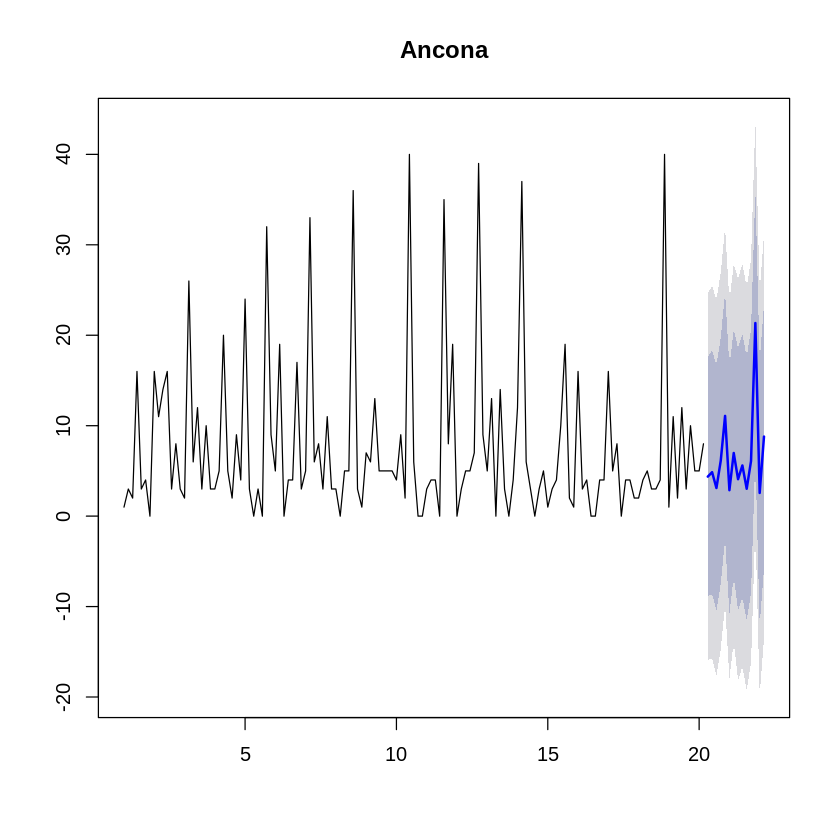

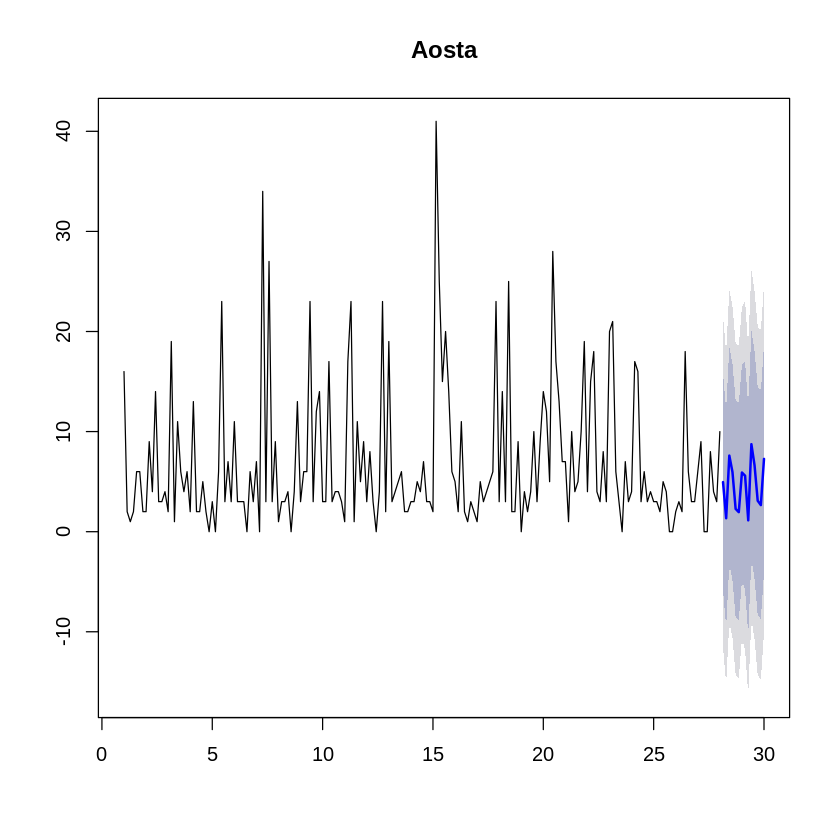

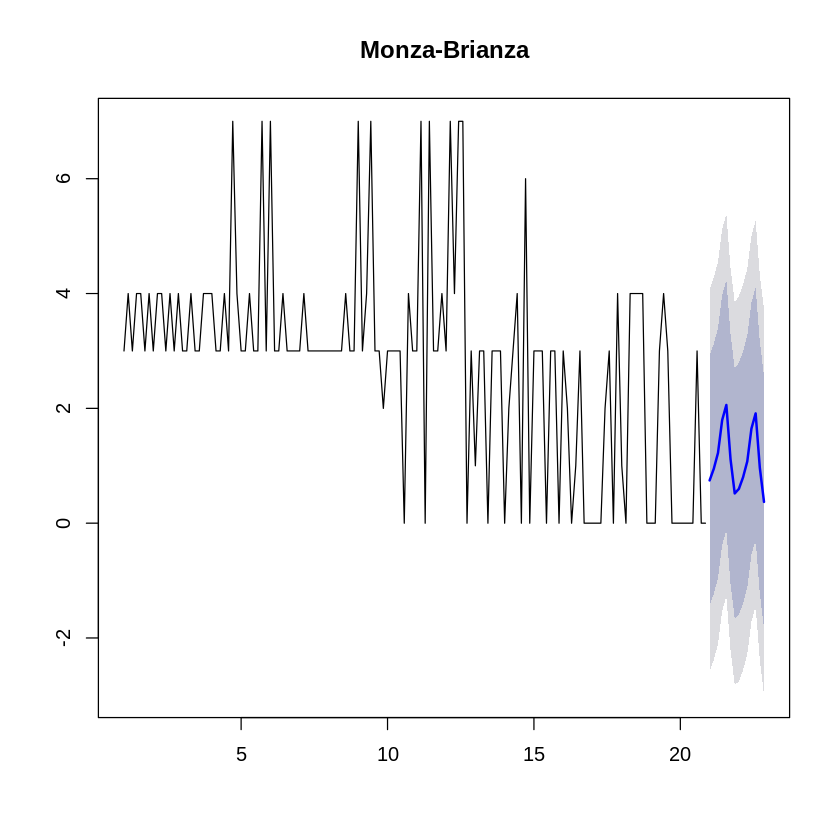

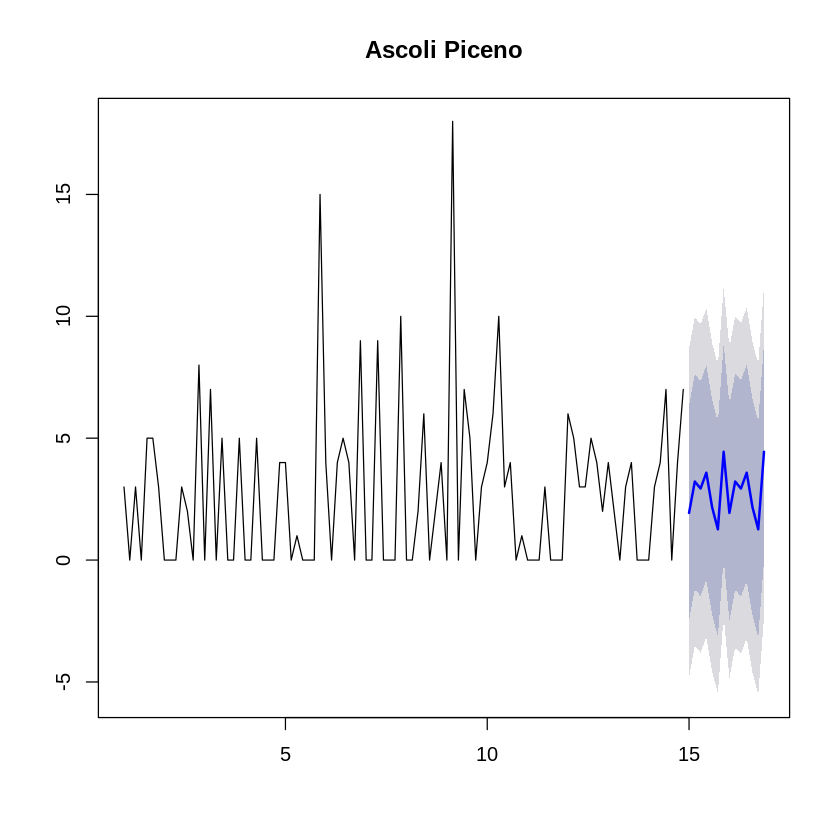

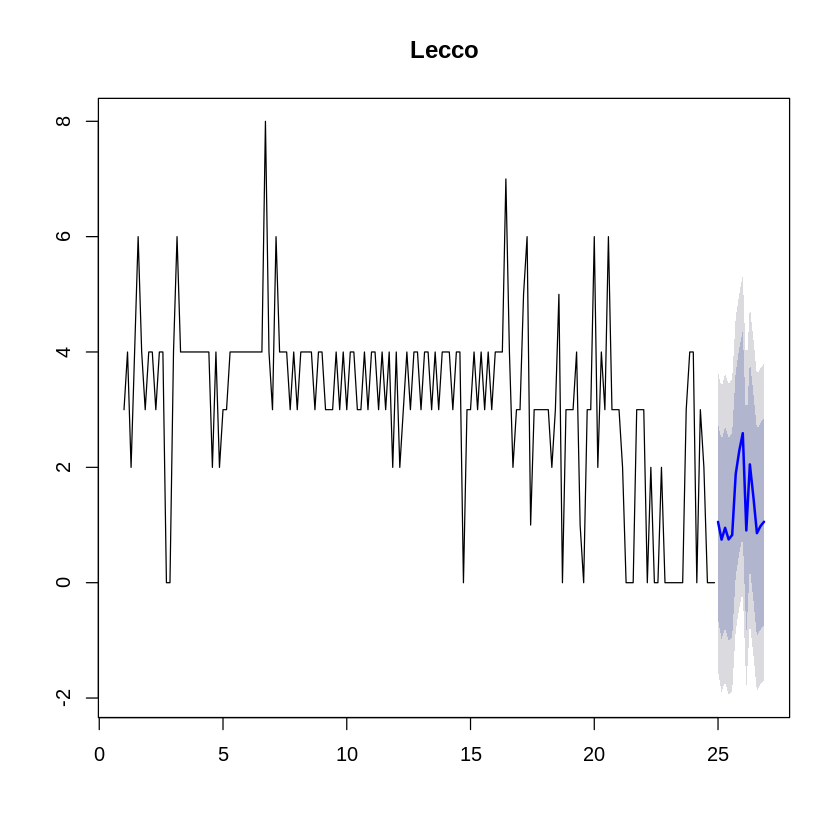

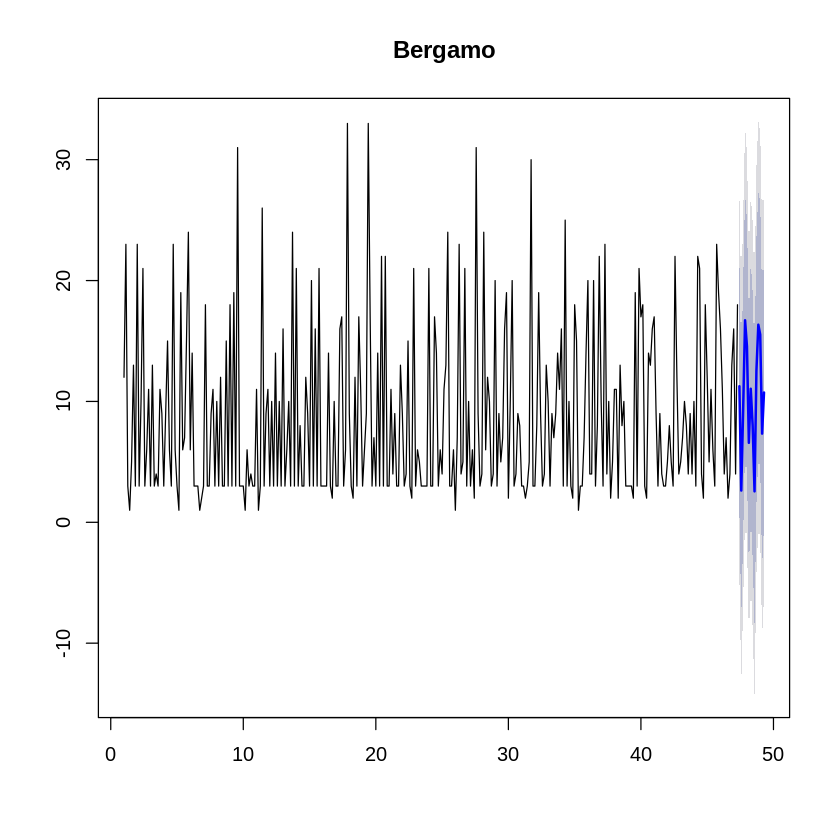

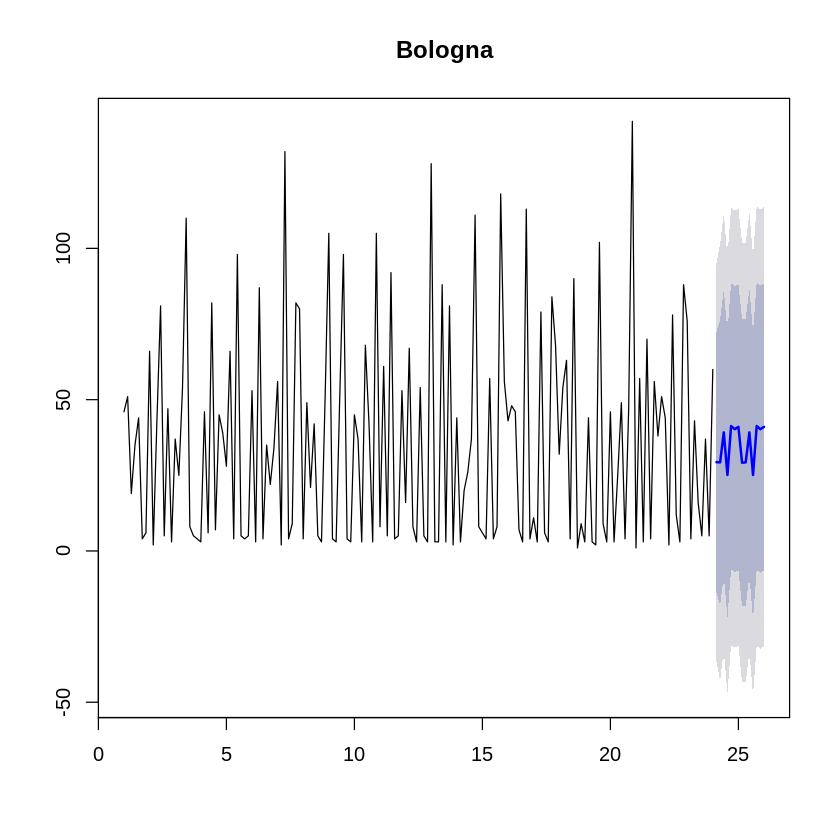

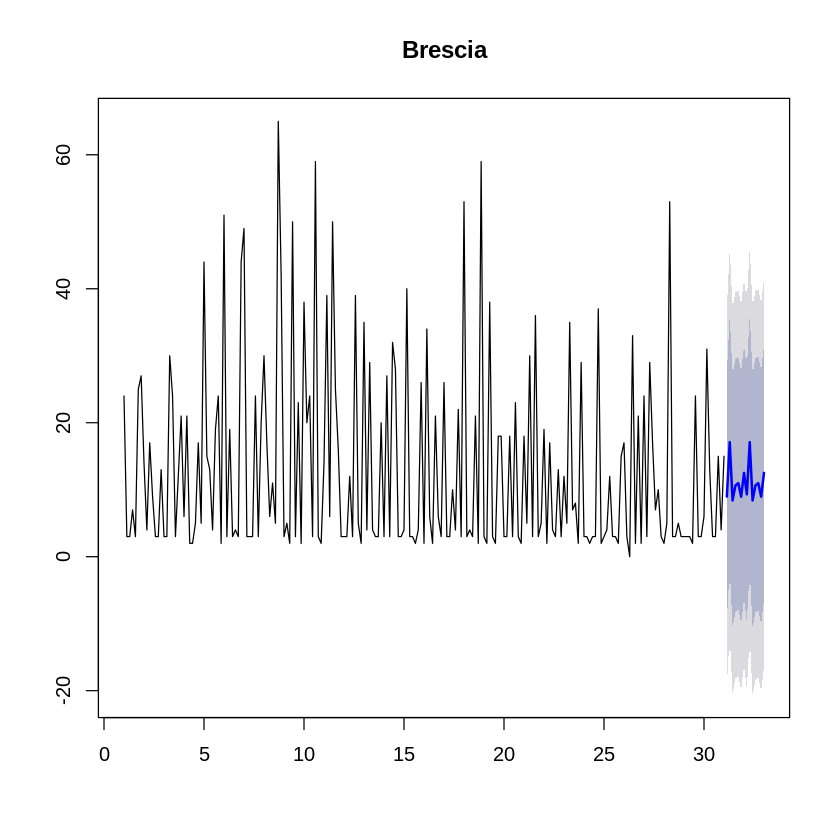

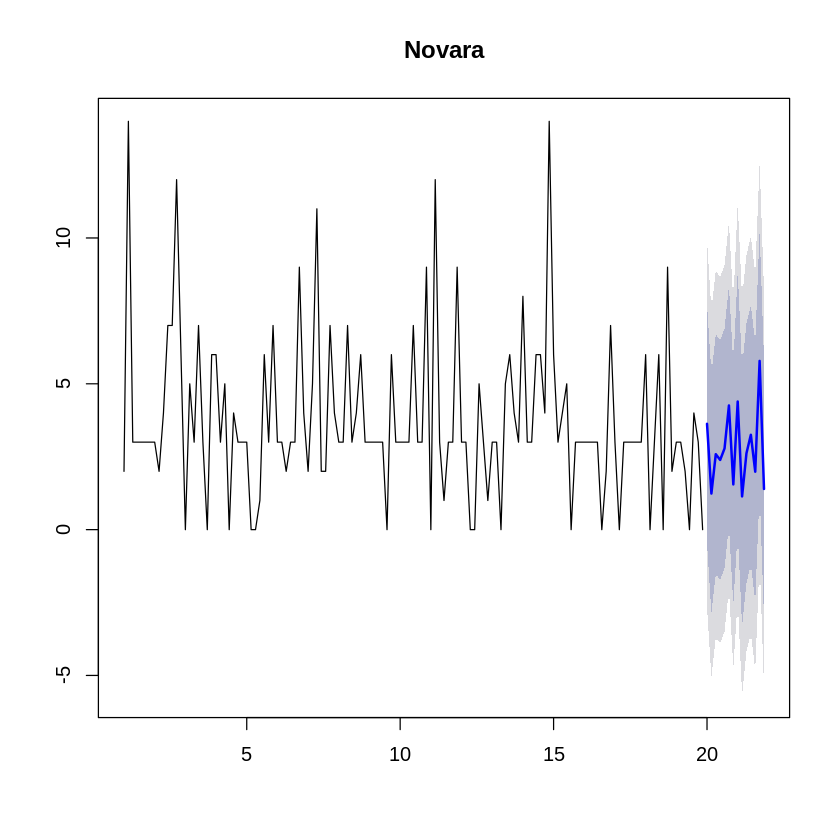

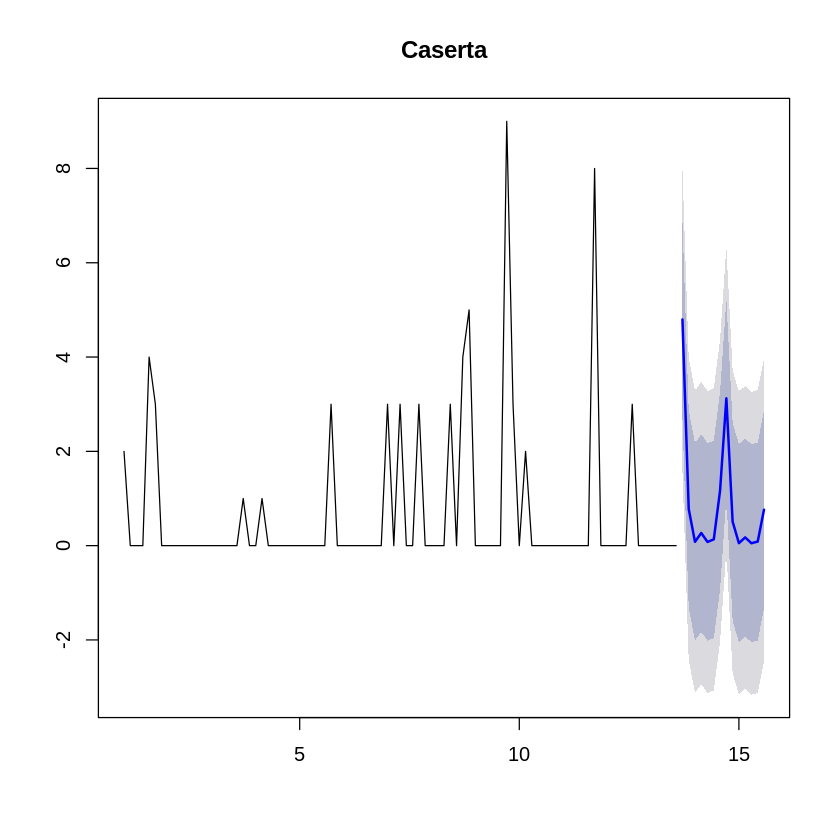

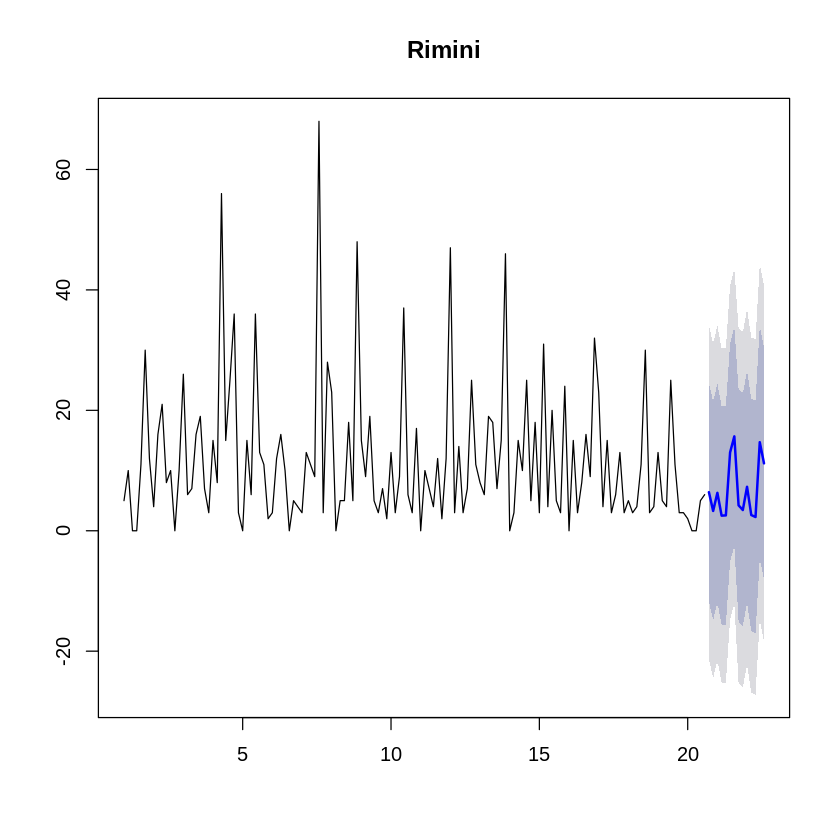

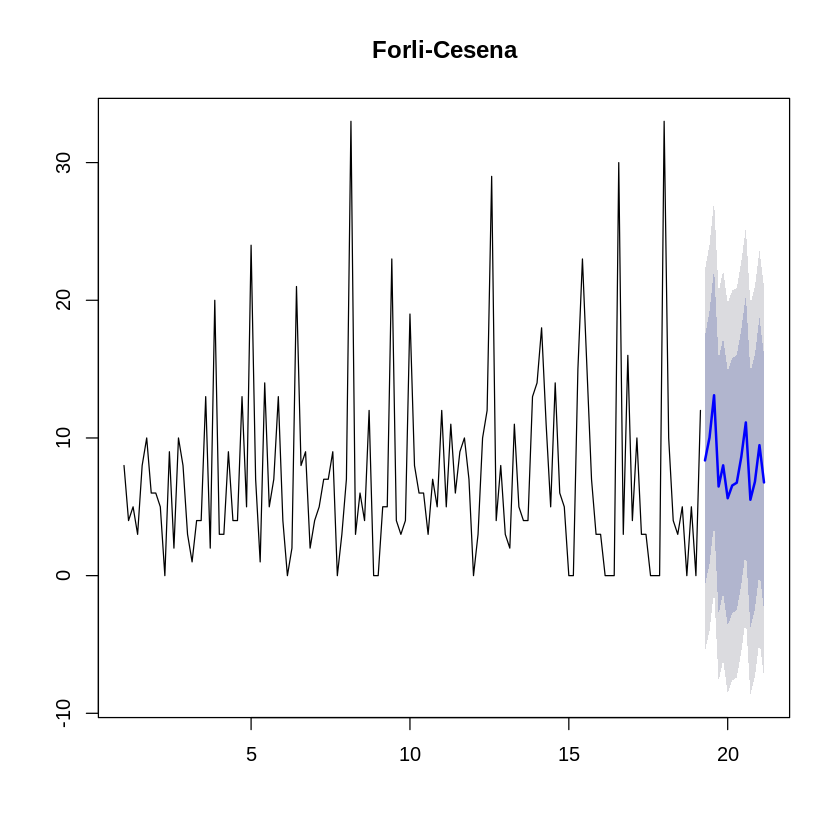

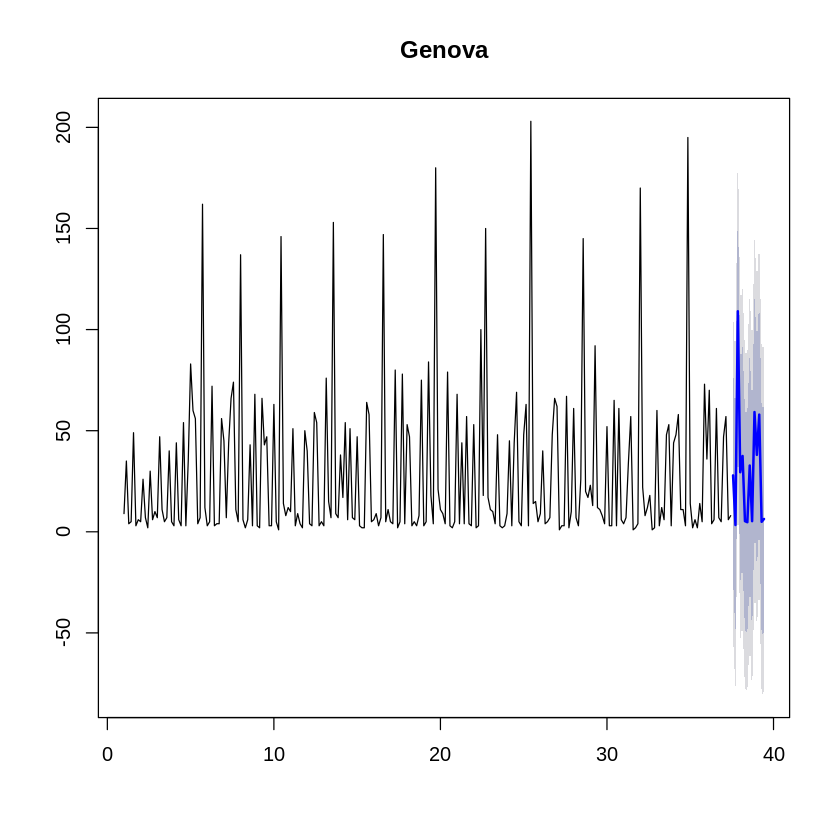

In [ ]:
for(i in seq(1, length(out)-80)){
        #par(mfrow = c(1,2))
        #plot(out[[i]]$etsfore)
        #plot(out[[i]]$arimafore)
        plot(out[[i]], main = paste(prov[i]))
        Sys.sleep(1)
}

In [229]:
pesc = df[df['provincia'] == 'Brindisi', c('dep_day','seatsleft','fullseats','seats')]

pesc['tot'] = pesc['seats'] + pesc['fullseats']
pesc$dep_day = as.Date(pesc$dep_day)
pesc = pesc[pesc$dep_day < '2017-03-31',]

# all desired dates.
alldates <- data.frame(dep_day=seq(as.Date('2017-01-01'), (as.Date('2017-03-30')), by="day"))
# merge
pesc <- merge(pesc, alldates, by="dep_day", all=TRUE)

pesc[is.na(pesc)] <- 0

#plot(pesc$dep_day, pesc$tot, type = 'b')

y <- ts(pesc$tot, frequency = 7)
arima.fore <- forecast(auto.arima(y), h=7)
arima.fore.seas <- forecast(auto.arima(y, D = 1), h=14)

In [210]:
prov[4]

[1] Ascoli Piceno
101 Levels: Alessandria Ancona Aosta Arezzo Ascoli Piceno Asti Avellino ... Viterbo

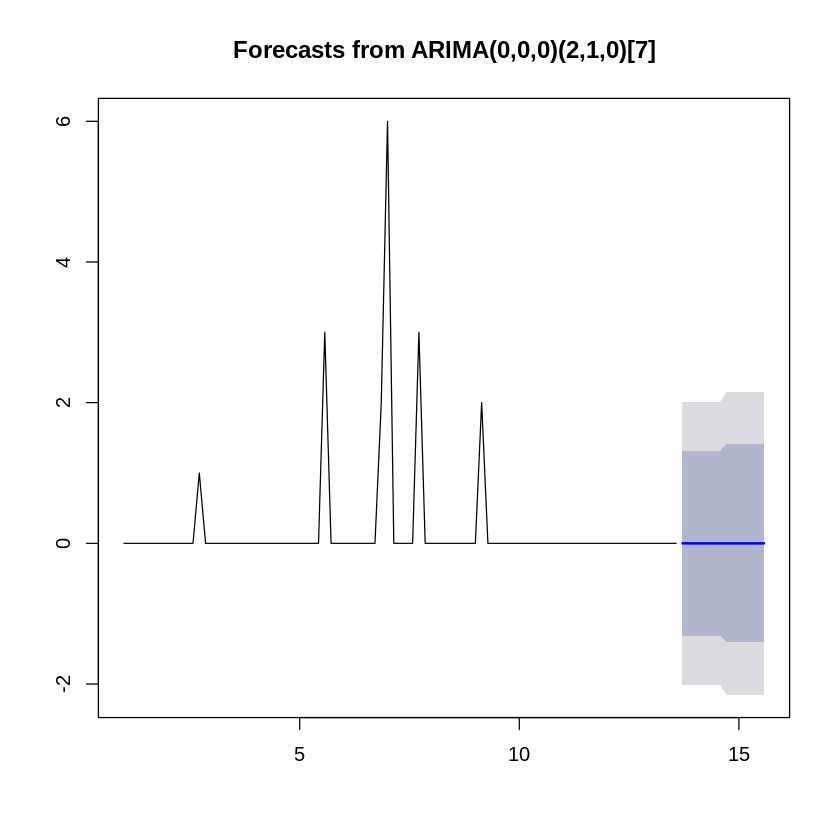

In [227]:
#par(mfrow=c(1,2))
#plot(arima.fore)
plot(arima.fore.seas)

In [86]:
?ts

In [98]:
pesc.ts <- ts(pesc$tot, frequency = 7)
print(pesc.ts, calendar = T)

   p1 p2 p3 p4 p5 p6 p7
1   0  0  0  3  9  4  7
2   0  0  3  0  0  0  0
3   4  0  0  0  0 12  0
4   0  0  0  0  0 12  5
5   0  0  0  0  0  9  3
6   0  0  0  0  0 21  5
7   7  0  0  0  0  3  0
8   0  0  1  5  4 16  0
9   0  7  0  0  0 10  0
10  0  0  0  3 12 10  7
11  0  0  0  5  3 11  0
12  0 15  0  0  5  0  0
13  0  0  0  1  0      


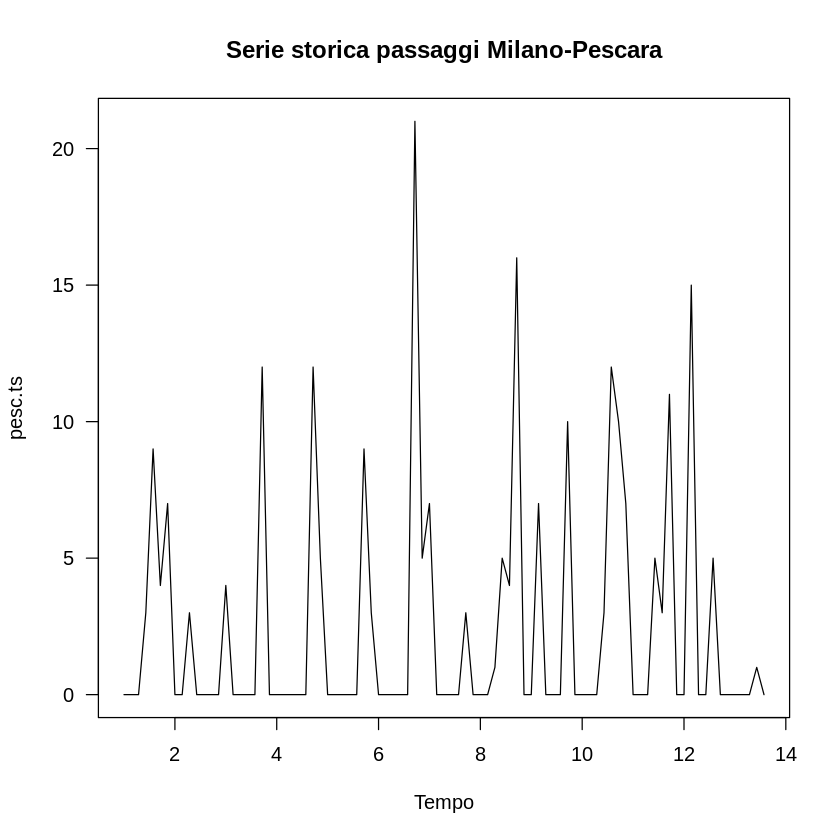

In [94]:
plot(pesc.ts, main="Serie storica passaggi Milano-Pescara", xlab="Tempo", las=1, cex.axis=0.8)

In [95]:
?stl

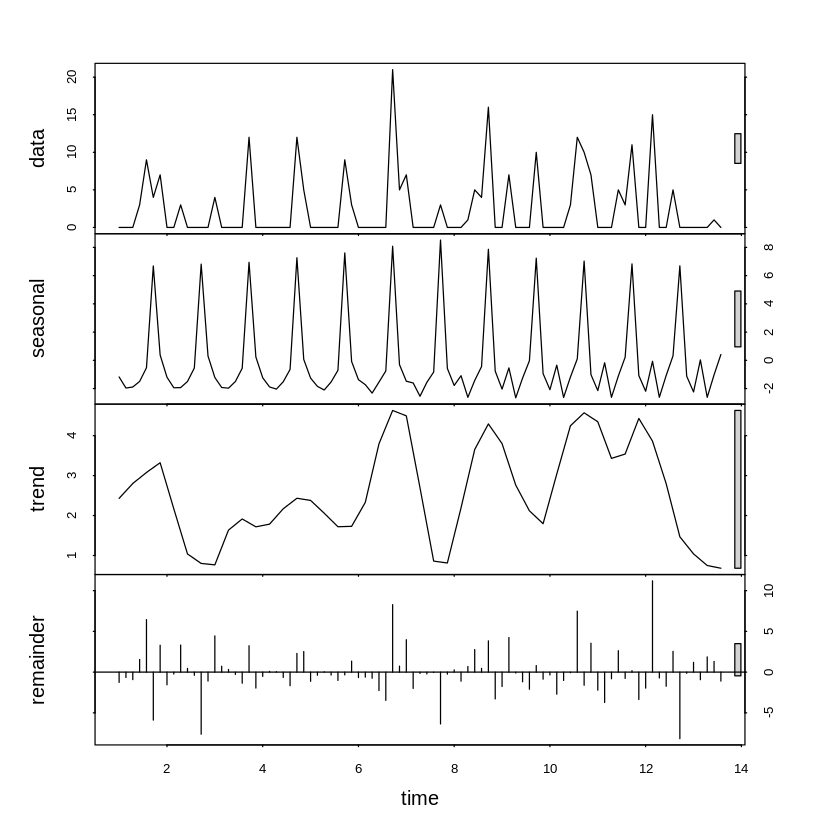

In [108]:
m1 <- stl(pesc.ts, s.window = 13) # scomposizione
plot(m1)

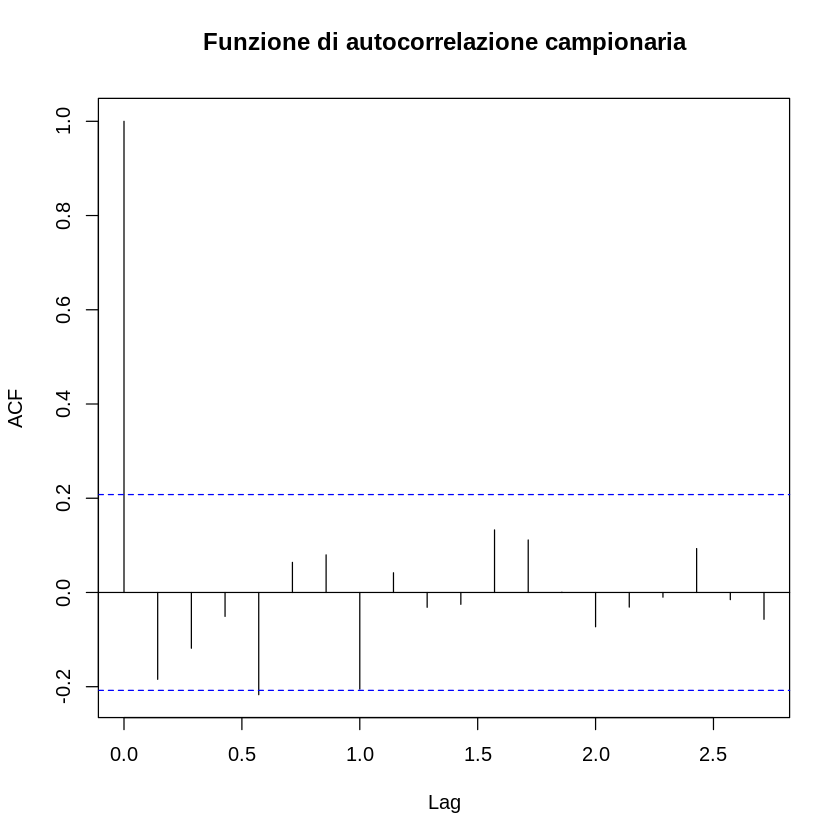

In [110]:
acf(m1$time.series[,"remainder"], main="Funzione di autocorrelazione campionaria")
# ok

In [112]:
# verifica normalità
#qqnorm(m1$time.series[,"remainder"], main="Q-Q plot residui")
#qqline(m1$time.series[,"remainder"], col=2)

shapiro.test(m1$time.series[,"remainder"]) # test di normalità dei residui
# facciamo finta che vada bene


	Shapiro-Wilk normality test

data:  ml$time.series[, "remainder"]
W = 0.91538, p-value = 2.337e-05


In [114]:
m2 <- HoltWinters(pesc.ts)
prev <- predict(m2, 7, prediction.interval = TRUE)

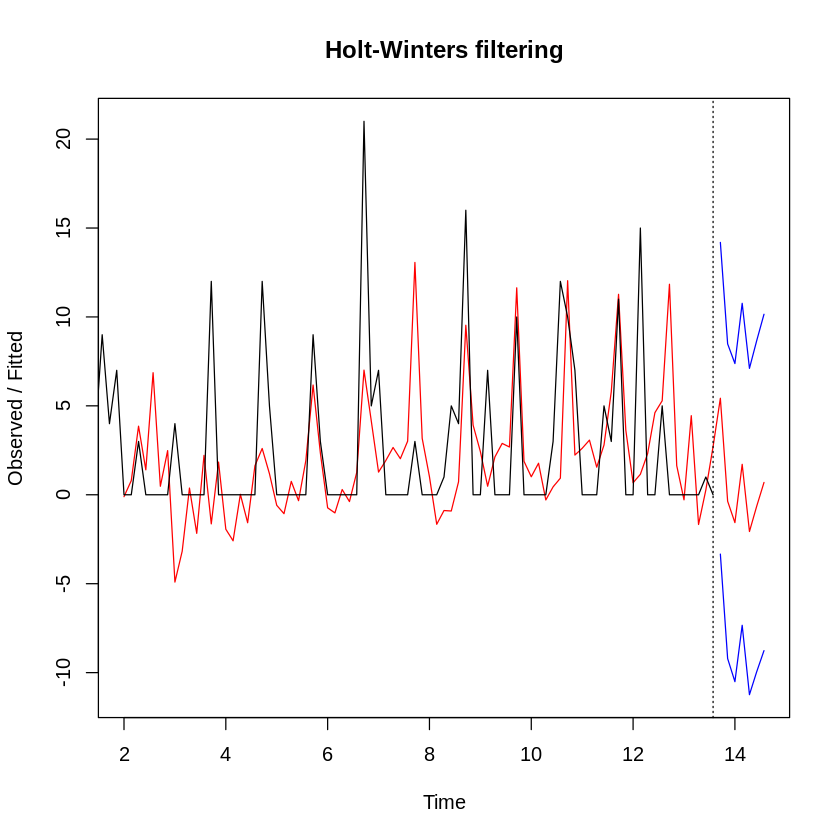

In [115]:
plot (m2,prev) # schifo

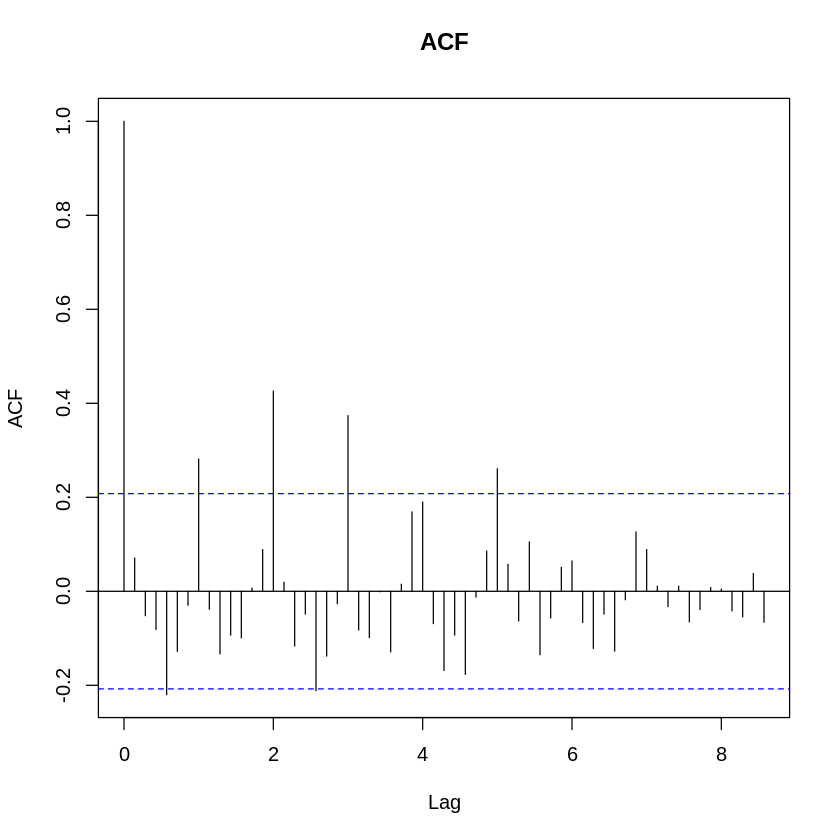

In [116]:
# ARIMA
acf(pesc.ts, 60, main="ACF")

In [128]:
require(TSA)
eacf(diff(diff(pesc.ts,1),7))

Loading required package: TSA
Warning message in library(package, lib.loc = lib.loc, character.only = TRUE, logical.return = TRUE, :
“there is no package called ‘TSA’”

ERROR: Error in eval(expr, envir, enclos): could not find function "eacf"
